# ML courses 5 & 6 - Practice on logistic regression and classification assessment

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Data preparation

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

**Loading the data set from Scikit-Learn**

In [97]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**   
Sklearn returns the dataset in the form of a dictionary. The actual dataset is stored under 'data', but there are other keys that give access to more information.

In [98]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Getting a description of the data set**

In [99]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [100]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [101]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [102]:
target_actual = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


In [103]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding. You will have to re-encode the variable a different way later.**

In [104]:
target = target_actual.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Your Mission
We have here a large dataset that could help predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of features that we will use to train and assess logistic regressions.

<font color=red><b>Questions in red have to be answered only after lecture session 6 (classification assessment).</font>

## We check at first if the tumor radius is a good predictor for breast cancer. 
Starting here, you must use the data contained in the variables `features` and `target` as they were defined in the previous cells.
###   1. Perform data exploration on the variable _mean radius_, taking into account the target class attributions.  

In [105]:
data = pd.concat([features, target_actual], axis=1)
print(data['mean radius'].describe())

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64


In [106]:
correlation = data['mean radius'].corr(data['tumor type'])
print(correlation)

-0.7300285113754558


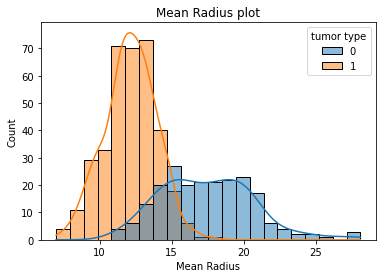

In [107]:
sns.histplot(data=data, x='mean radius', hue='tumor type', kde=True)
plt.title('Mean Radius plot')
plt.xlabel('Mean Radius')
plt.ylabel('Count')
plt.show()

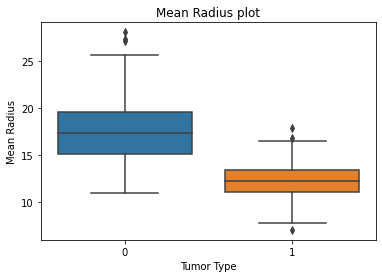

In [108]:
sns.boxplot(x='tumor type', y='mean radius', data=data)
plt.title('Mean Radius plot')
plt.xlabel('Tumor Type')
plt.ylabel('Mean Radius')
plt.show()


📝 Do you think _mean radius_ can make an good predictor of tumor type? Why? 

yes,  since it has corelation of -0.73 it can be used as a good precictor of the tumor 

### 2. Encode the target variable _tumor type_ and make sure you use the following encoding:
* 0 as 'benign'
* 1 as 'malignant'  
Since we are interested in the malignant tumors, we choose to encode them as 1.

In [109]:
target_new=target.replace({'malignant':1, 'benign':0})
data_new = pd.concat([features, target_new], axis=1)

### 3. Plot the target variable with respect to mean radius (scatter plot).  

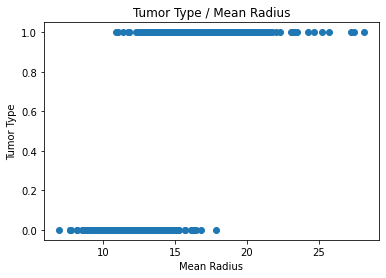

In [110]:
plt.figure(figsize=(6, 4))
plt.scatter(data_new['mean radius'], data_new['tumor type'])
plt.xlabel('Mean Radius')
plt.ylabel('Tumor Type')
plt.title('Tumor Type / Mean Radius')
plt.show()

📝 Do you think a logistic regression model can model the relationship between the two variables reasonably well?  
Why or why not?

as the goal is to predict if tumor exists or not , the logistic regression model can estimate the probability of a tumor being malignant based on the given features.

### 4. Train a logistic regression model.


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=features['mean radius'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, target_new, test_size=0.25, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)

### 5. Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of _mean radius,_ according to your logistic regression model. 
More formally, the curve should represent the following probability:  
        $P\left( Y=1 \left| X=x \right. \right)$ _where $Y$ is the tumor type and $x$ is the mean radius._

Here is a piece of code that will display the probability curve of your model. Modify it so the scatter plot of the data appear on the same plot as the probability curve:

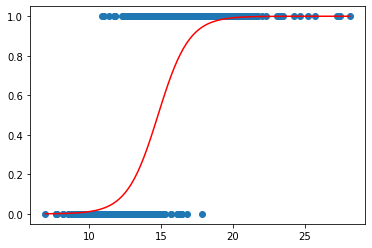

In [112]:
logistic_regression = logreg## Replace 'logreg' with the variable name of your trained logistic regression model
plt.scatter(x=features['mean radius'],y=target_new)

X_curve = np.linspace(np.min(features['mean radius']), np.max(features['mean radius']), 100).reshape(-1, 1)  ## Generate an array of evenly-spaced points on X based on the range of 'mean radius' in the dataset
y_proba = logistic_regression.predict_proba(X_curve)  ## Get the corresponding probability predictions
y_proba_class1 = y_proba[:, 1]  ## Isolate the probability for the positive class (P(Y=1))

plt.plot(X_curve, y_proba_class1, c='red')
plt.show()



###  6. According to your model, what is the minimum _mean radius_ value for considering that the tumor is malignant?  
  Make a few predictions with your model with different values of _mean radius_ to check your intuition. 

### around 14.81 is the minimum value for considering that the tumor is malignant

In [113]:
mean_radius_values = [14.5, 14.6, 14.7, 14.8, 14.81, 14.82, 15.0, 15.1]

for mean_radius in mean_radius_values:
    X_pred = np.array([[mean_radius]])
    prediction = logreg.predict(X_pred)
    print("Mean Radius:", mean_radius, "\tPrediction:", prediction[0])

Mean Radius: 14.5 	Prediction: 0
Mean Radius: 14.6 	Prediction: 0
Mean Radius: 14.7 	Prediction: 0
Mean Radius: 14.8 	Prediction: 0
Mean Radius: 14.81 	Prediction: 1
Mean Radius: 14.82 	Prediction: 1
Mean Radius: 15.0 	Prediction: 1
Mean Radius: 15.1 	Prediction: 1


### <font color=red>7. Compute the performance metrics for your model.</font> 

a) Compute and display the confusion matrix.

In [114]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[85  4]
 [ 9 45]]


b) Compute the accuracy, precision and recall "by hand" using the values that appear in the confusion matrix. 


In [115]:
True_negatives = confusion_mat[0, 0]
False_positives = confusion_mat[0, 1] 
False_negatives = confusion_mat[1, 0] 
True_positives = confusion_mat[1, 1]  
accuracy = (True_negatives + True_positives) / (True_negatives + False_positives + False_negatives + True_positives)
precision = True_positives / (True_positives + False_positives)
recall = True_positives / (True_positives + False_negatives)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9090909090909091
Precision: 0.9183673469387755
Recall: 0.8333333333333334


c) Compute the f1-score

In [116]:
f1_score = 2*(precision * recall) / (precision + recall)
print("F1-score:", f1_score)

F1-score: 0.8737864077669903


d) 📝 Comment your results. What can you say about your model's performance?

the f1-score of the model is about 0.87 which incicates that the model is performing well, as we have take  only one feature, it is better to add more features to improve the  model performance 

### <font color=red>8. Imagine that you are developing this algorithm for an oncologist.

a) 📝 Should you focus on maximizing the recall or the precision of the prediction? Why? 

we should focus more on maximizing the recall, as false negative can cause serious consequence.


b) 📝 Are there questions that you might need to ask the oncologist in order to decide what metric to use? 

yes, asking the potential consequences of a false negative and a false positive and how critical is it to detect malignant tumors accurately would help in dedveloping the model 

### <font color=red>9. Tweak your model's prediction the way you proposed in your answer of question 8. </font>
    Show results demonstrating if its predictions have become more appropriate for cancer diagnosis. 

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
threshold = 0.3
y_pred_adjusted = (logreg.predict_proba(X_test)[:, 1] >= threshold).astype(int)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_score_adjusted = f1_score(y_test, y_pred_adjusted)

print("Adjusted Model Metrics:")
print("Accuracy:", accuracy_adjusted)
print("Precision:", precision_adjusted)
print("Recall:", recall_adjusted)
print("F1-score:", f1_score_adjusted)

Adjusted Model Metrics:
Accuracy: 0.8531468531468531
Precision: 0.7538461538461538
Recall: 0.9074074074074074
F1-score: 0.8235294117647058


📝 Comment your results.

when the recall is improved the accuracy and precision is reduced

## We decide to add an extra feature to our model.
### 10. Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant feature to choose (in addition to mean radius).

In [118]:
corr_text = data['mean texture'].corr(data['tumor type'])
print(corr_text)
corr_peri = data['mean perimeter'].corr(data['tumor type'])
print(corr_peri)
corr_area = data['mean area'].corr(data['tumor type'])
print(corr_area)


-0.4151852998452039
-0.7426355297258322
-0.7089838365853892


📝 Which predictor do you choose? Explain why.

'mean perimeter' because it has high corelation of -0.74 than other features

### 11. Re-train your logistic regression with your two features (mean radius and the one you have picked).

In [119]:
X_new = features[['mean radius', 'mean perimeter']].values
y_new = target_new.values.ravel()

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

logreg_new = LogisticRegression()
logreg_new.fit(X_train_new, y_train_new)
y_pred = logreg_new.predict(X_test_new)


### <font color=red>12. Calculate the performance of your model with two features.</font>


In [120]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
True_negatives = confusion_mat[0, 0]
False_positives = confusion_mat[0, 1] 
False_negatives = confusion_mat[1, 0] 
True_positives = confusion_mat[1, 1]  
accuracy = (True_negatives + True_positives) / (True_negatives + False_positives + False_negatives + True_positives)
precision = True_positives / (True_positives + False_positives)
recall = True_positives / (True_positives + False_negatives)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
f1_score = 2*(precision * recall) / (precision + recall)
print("F1-score:", f1_score)

Confusion Matrix:
[[86  3]
 [ 7 47]]
Accuracy: 0.9300699300699301
Precision: 0.94
Recall: 0.8703703703703703
F1-score: 0.9038461538461539


## Comparison of the two models
### <font color=red>13. Plot and compare the ROC curves of the two previous models.</font> 
Note: the curves should appear on the same graph with different colors in order to facilitate comparison.

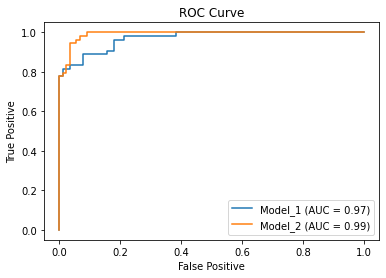

In [126]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr1, tpr1, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, _ = roc_curve(y_test_new, logreg_new.predict_proba(X_test_new)[:, 1])
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr1, tpr1, label='Model_1 (AUC = %.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Model_2 (AUC = %.2f)' % roc_auc2)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend()
plt.show()


📝 Comment

from the graph above model 2 has better performance

### <font color=red>14. Compute and compare the logistic loss for the two previous models.</font> 

In [130]:
from sklearn.metrics import log_loss


log_loss1 = log_loss(y_test, logreg.predict_proba(X_test))
log_loss2 = log_loss(y_test_new, logreg_new.predict_proba(X_test_new))
print("Logistic Loss for Model 1:", log_loss1)
print("Logistic Loss for Model 2:", log_loss2)



Logistic Loss for Model 1: 0.2281220744183213
Logistic Loss for Model 2: 0.17187156888965527


📝 Comment

the model 2 with new feature has a lower logistic loss 